# Linear regression

## Portland Housing Prices/Sales Jul 2020 - Jul 2021
- https://www.kaggle.com/datasets/threnjen/portland-housing-prices-sales-jul-2020-jul-2021
- 348 columns
- 25681 records

## Learning dataset
- Data with correct results
- m 	= number of examples = 100
- x’s = input variables / features
- y’s = output variable / target
- (x, y) = single row of training dataset
- x(2) = (4, 5, 3374, 85)
- y(2) = 1 050 000
- !!! Subset statistically not corresponding with original dataset


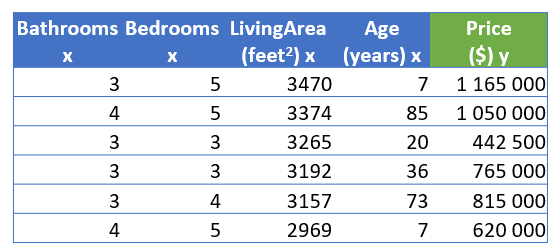

### Read input data from CSV file

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv ("portland_filtered.csv",  sep=';')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   bathrooms   100 non-null    int64
 1   bedrooms    100 non-null    int64
 2   livingArea  100 non-null    int64
 3   age         100 non-null    int64
 4   price       100 non-null    int64
dtypes: int64(5)
memory usage: 4.0 KB


### Data exploration

In [4]:
data.head()

,bathrooms,bedrooms,livingArea,age,price
0,3,5,3470,7,1165000
1,4,5,3374,85,1050000
2,3,3,3265,20,442500
3,3,3,3192,36,765000
4,3,4,3157,73,815000


In [5]:
data.describe()

,bathrooms,bedrooms,livingArea,age,price
count,100.000000,100.000000,100.000000,100.00000,1.000000e+02
mean,2.380000,3.260000,1974.080000,49.88000,5.196074e+05
std,0.838228,0.860115,663.629851,32.77973,1.722241e+05
min,1.000000,1.000000,766.000000,3.00000,1.650000e+05
25%,2.000000,3.000000,1530.000000,20.00000,4.125000e+05
50%,2.000000,3.000000,1859.000000,47.50000,5.000000e+05
75%,3.000000,4.000000,2490.250000,75.25000,5.995312e+05
max,5.000000,6.000000,3470.000000,114.00000,1.165000e+06


A strong direct or indirect correlation may indicate a relationship between the input parameters. 
This can help us in choosing the input parameters of the model.

In [6]:
corr=data.corr()
corr

,bathrooms,bedrooms,livingArea,age,price
bathrooms,1.000000,0.618132,0.566558,-0.536517,0.463856
bedrooms,0.618132,1.000000,0.641684,-0.224947,0.498934
livingArea,0.566558,0.641684,1.000000,0.019381,0.759973
age,-0.536517,-0.224947,0.019381,1.000000,0.114328
price,0.463856,0.498934,0.759973,0.114328,1.000000


In [7]:
# libraries for generating graphs
import seaborn as sns
import matplotlib.pyplot as plt

Sometimes it can be helpful to display correlations using a heatmap.
For instance feature age has almost no relation with other features.

<Axes: >

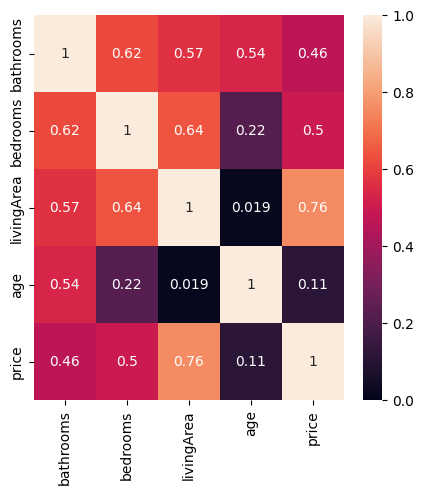

In [8]:
plt.figure(figsize = (5,5))
sns.heatmap(corr.abs(), annot=True, vmin=0, vmax=1)

### Data visualization

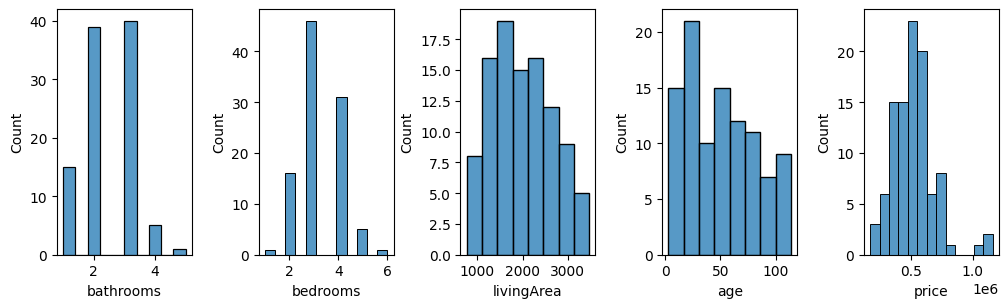

In [9]:
fig, axs = plt.subplots(ncols=5, nrows=1, figsize=(10, 3))
index = 0
axs = axs.flatten()
for k,v in data.items():
    sns.histplot(v, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

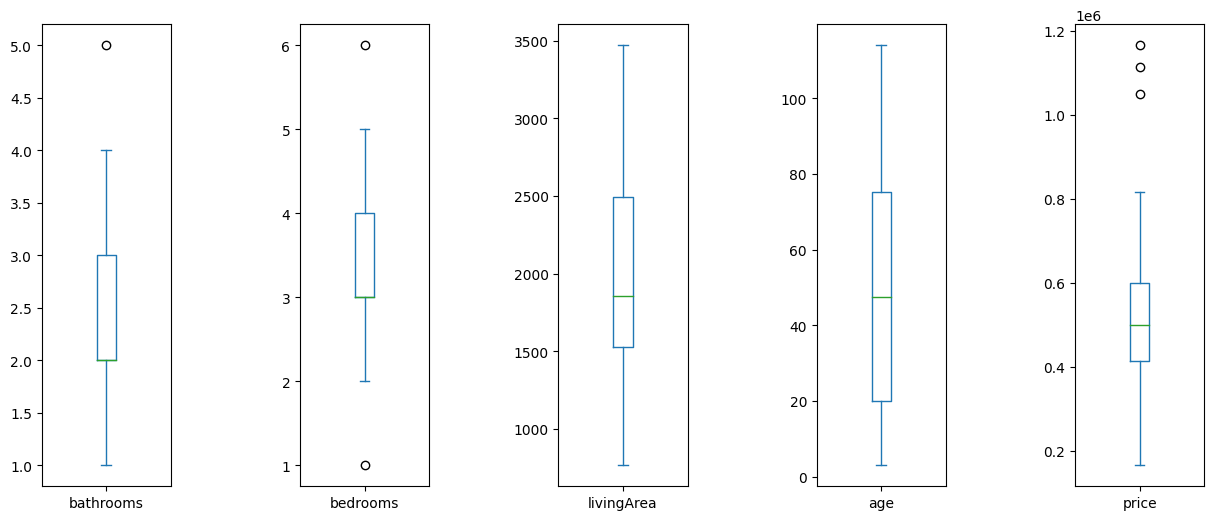

In [10]:
# same information shown in boxplot
data.plot(
    kind='box', 
    subplots=True, 
    sharey=False, 
    figsize=(15, 6)
)
plt.subplots_adjust(wspace=1) 
plt.show()

Creating graphs for all combination of two features could shown us type of dependency.

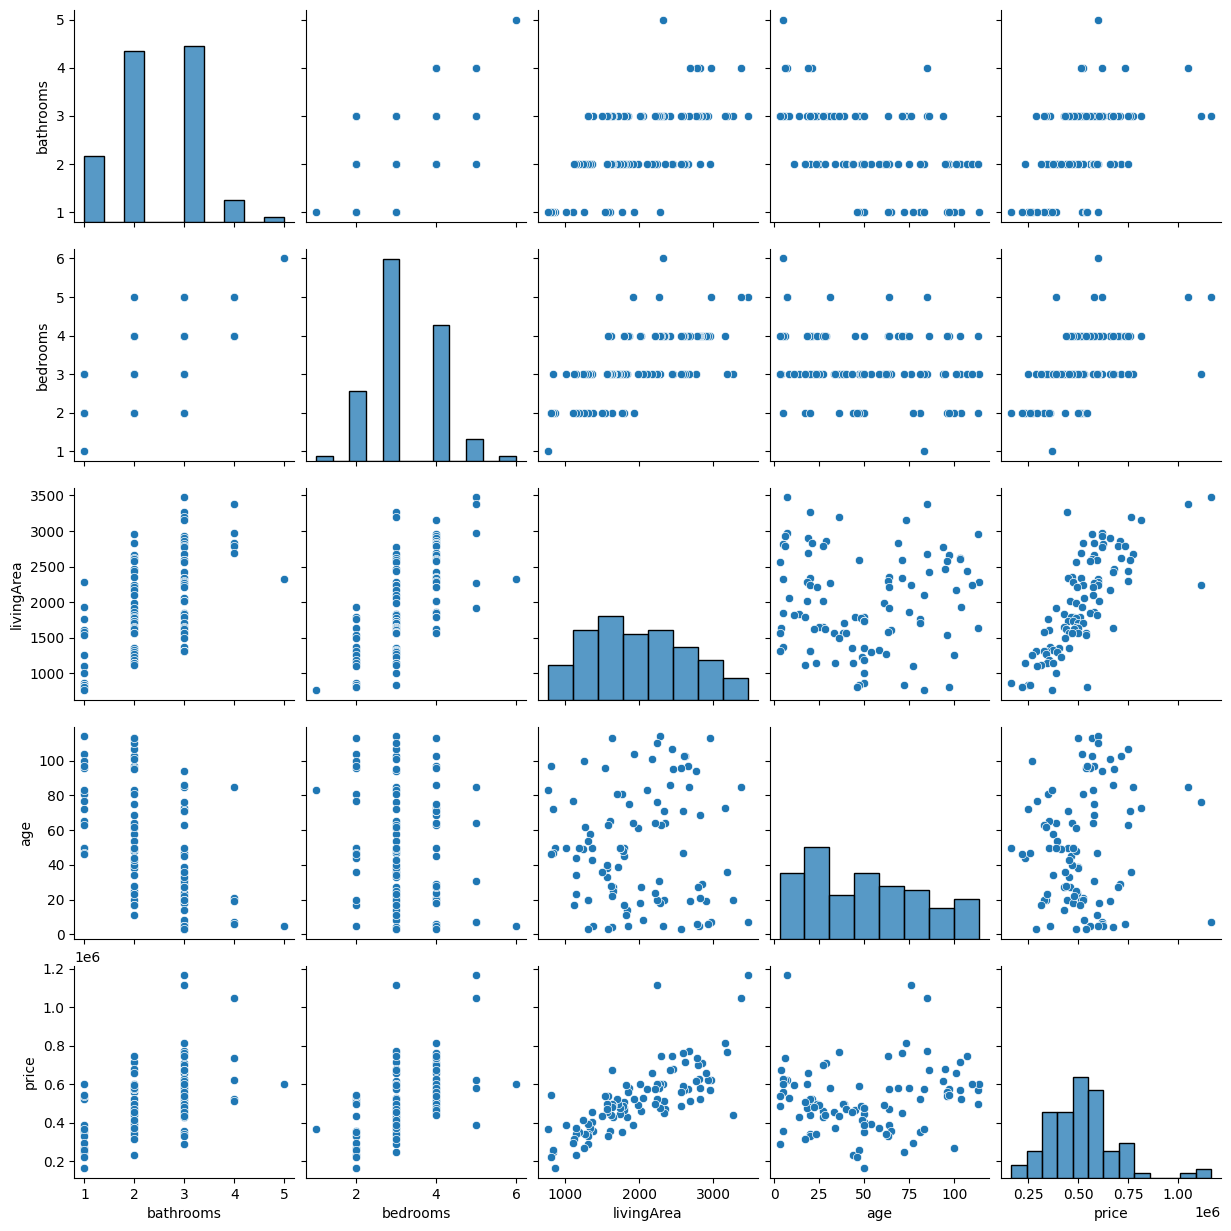

In [11]:
sns.pairplot(data)

We will use Linear regression model. There is a linear dependency between columns living area and price.

### Data preparation

Before we push data into model, we will do some transformation.

In [12]:
import numpy as np

In [14]:
X = data['livingArea'].to_numpy()
Y = data['price'].to_numpy()

### Data standardization

Every feature has different mean, standard deviation.

Standardization center and scale features.

Reasons:
* prevent some features from dominating the model
* can help machine learning models converge more quickly
* can make it easier to interpret the coefficients of a machine learning model

Calculation:
* x_new = (x – mean) / standard_deviation
* mean = sum(x) / count(x)
* standard_deviation = sqrt( sum( (x – mean)^2 ) / count(x))

In [15]:
print (f"Y mean: {Y.mean()}")
print (f"Y standard deviation: {Y.std()}")
Y=np.array((Y-Y.mean())/Y.std())

Y mean: 519607.36
Y standard deviation: 171360.80814646737


In [16]:
print (f"X mean: {X.mean()}")
print (f"X standard deviation: {X.std()}")
X=np.array((X-X.mean())/X.std())
X = X.reshape(X.shape[0], -1)

X mean: 1974.08
X standard deviation: 660.3033648255929


### Splitting dataset into train, test and validation subsets

In [17]:
# library with supervised and unsupervised learning algorithms
from sklearn.model_selection import train_test_split

train_ratio = 0.75
validation_ratio = 0.15
test_ratio = 0.10

# train is now 75% of the entire data set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1 - train_ratio)

# test is now 10% of the initial data set
# validation is now 15% of the initial data set
X_val, X_test, Y_val, Y_test = train_test_split(X_test, Y_test, test_size=test_ratio/(test_ratio + validation_ratio)) 

print(X_train.shape)
print (X_val.shape)
print (X_test.shape)

(75, 1)
(15, 1)
(10, 1)


### Training linear regression model

In [18]:
import random
def initialize(dim):
    b=random.random()
    weights=np.random.rand(dim)
    return b,weights

In [19]:
b,weights=initialize(X.shape[1])
print("Bias: ",b,"Weights: ",weights)

Bias:  0.6757669183564446 Weights:  [0.04244238]


In [20]:
def predict(b, weights, X):
    return b + np.dot(X,weights)

In [21]:
Y_predicted=predict(b,weights,X)
Y_predicted[0:10]

array([0.7719203 , 0.7657497 , 0.7587435 , 0.75405127, 0.75180157,
       0.73971748, 0.73939609, 0.73714639, 0.73579658, 0.73226134])

In [22]:
import math
def get_cost(Y,Y_predicted):
    Y_resd=Y-Y_predicted
    return np.sum(np.dot(Y_resd.T,Y_resd))/(len(Y-Y_resd)*2)

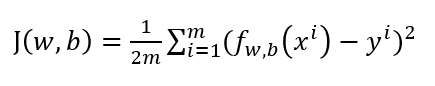

In [23]:
get_cost(Y,Y_predicted)

0.6969760827024519

In [24]:
def update_weights(x, y, y_predicted, b_0, weights_0, learning_rate):
    db=(np.sum(y_predicted - y))/len(y)
    dw=(np.dot((y_predicted - y),x))/len(y)
    b_1= b_0 - learning_rate*db
    weights_1 = weights_0 - learning_rate*dw
    return b_1, weights_1

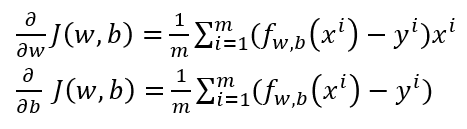

In [25]:
print("Bias: ",b,"Weights: ",weights)

Bias:  0.6757669183564446 Weights:  [0.04244238]


In [26]:
b, weights=update_weights(X, Y, Y_predicted, b, weights, 0.01)
print("Bias: ",b,"Weights: ",weights)

Bias:  0.6690092491728802 Weights:  [0.04961768]


In [27]:
Y_predicted=predict(b,weights,X)
get_cost(Y, Y_predicted)

0.6873095476137923

In [28]:
def run_gradient_descent(X, Y, alpha, num_iterations):
    b, weights=initialize(X.shape[1])
    iter_num=0
    gd_iterations_df=pd.DataFrame(columns=['iteration','cost'])
    result_idx=0
    
    for each_iter in range(num_iterations):
        Y_predicted = predict(b, weights,X)
        this_cost=get_cost(Y,Y_predicted)
        prev_b=b
        prev_weights=weights
        b, weights = update_weights(X,Y,Y_predicted,prev_b, prev_weights, alpha)
        if(iter_num%10==0):
            gd_iterations_df.loc[result_idx]=[iter_num,this_cost]
            result_idx=result_idx+1
        iter_num +=1
    print("Final Estimate of b and weights : ",b, weights)
    return gd_iterations_df,b,weights

In [29]:
gd_iterations_df,b,weights=run_gradient_descent(X,Y,alpha=0.001,num_iterations=200)

Final Estimate of b and weights :  0.37121729919968466 [0.23287015]


### Model validation

In [33]:
Y_train_prediction=predict(b, weights, X_train)
get_cost(Y_train, Y_train_prediction)

0.4776073985585539

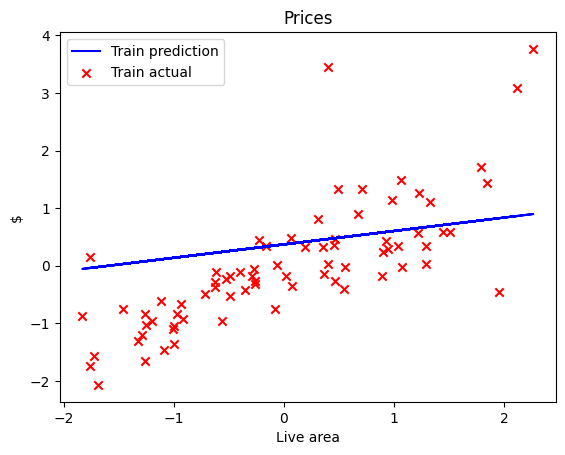

In [34]:
plt.plot (X_train, Y_train_prediction, c='b', label = "Train prediction")
plt.scatter (X_train, Y_train, marker = 'x', c='r', label="Train actual")
plt.title ("Prices")
plt.ylabel("$")
plt.xlabel("Live area")
plt.legend()
plt.show()

In [35]:
Y_val_prediction = predict(b, weights, X_val)

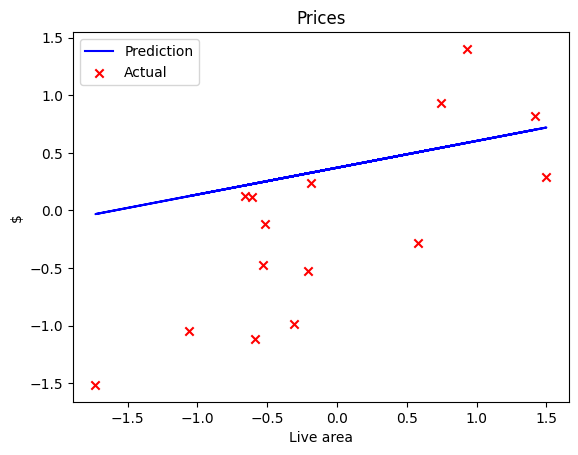

In [36]:
plt.plot (X_val, Y_val_prediction, c='b', label = "Prediction")
plt.scatter (X_val, Y_val, marker = 'x', c='r', label="Actual")
plt.title ("Prices")
plt.ylabel("$")
plt.xlabel("Live area")
plt.legend()
plt.show()

### Learning process

Text(0, 0.5, 'Cost or MSE')

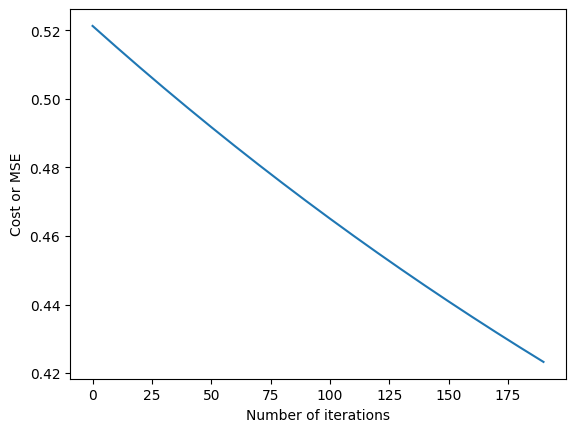

In [37]:
%matplotlib inline
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Cost or MSE")

Final Estimate of b and weights :  3.548936613775769e-10 [0.75997296]
Final Estimate of b and weights :  0.010443549827491004 [0.66854144]


Text(0.5, 1.0, 'Cost Vs. Iterations for different alpha values')

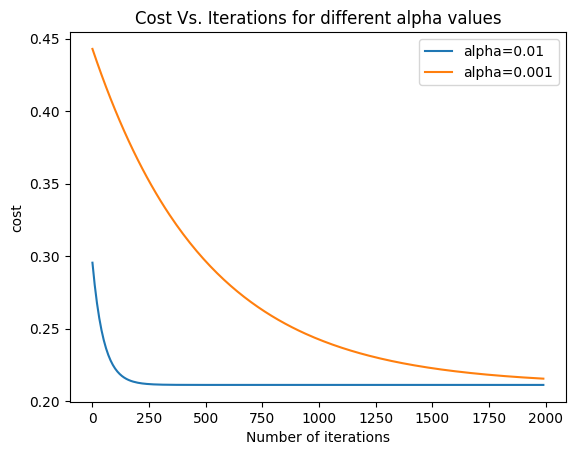

In [38]:
alpha_df_1,b,weights=run_gradient_descent(X,Y,alpha=0.01,num_iterations=2000)
alpha_df_2,b,weights=run_gradient_descent(X,Y,alpha=0.001,num_iterations=2000)
plt.plot(alpha_df_1['iteration'],alpha_df_1['cost'],label="alpha=0.01")
plt.plot(alpha_df_2['iteration'],alpha_df_2['cost'],label="alpha=0.001")
plt.legend()
plt.ylabel('cost')
plt.xlabel('Number of iterations')
plt.title('Cost Vs. Iterations for different alpha values')